In [40]:
# NOTEBOOK OVERVIEW
# Analyze the difference/similarity between user's resume and the clusters created
# in previous notebook 4_cluster-requirements. Allowing one to glean improvements
# to their resume and education/self-study.


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity 

%matplotlib inline
from matplotlib import pyplot
import pandas as pd
import numpy as np

import pickle
import random


In [42]:
# manually enter skills listed on user's resume 
resume_skills = 'Python, Pandas, machine learning, natural language processing'

# combine cluster data with assigned cluster

sr_file = open('data/skill_reqs_list.pkl', 'rb')
skill_reqs = pickle.load(sr_file)
sr_file.close()

# rtc: requirements-to-cluster
rtc_df = pd.read_pickle('data/clust_labels_df.pkl', 'zip')
rtc_df.insert(0, 'bullets', skill_reqs)
print(rtc_df.shape)
print(rtc_df.head())


(1747, 2)
                                             bullets  cluster
0  Demonstrated ability to propose, initiate, and...        0
1  Entrepreneurial abilities: demonstrated skills...        0
2  Self-motivated and works well both independent...        0
3  Strong collaboration skills with highly techni...        2
4  Excellent and demonstrated ability to regularl...        0


In [43]:
# compute and store cosine similarities between user resume's skills
# and the skill requirement clusters for visualization

res_clust_sim = {}
clustered_bullets = {}
k = 4
for i in range(k):
    clustered_bullets[i] = rtc_df[rtc_df['cluster'] == i]['bullets']
    clust = ' '.join(
        (b for b in clustered_bullets[i]))
    
    vocab = TfidfVectorizer(stop_words='english')
    vocab.fit((resume_skills, clust))
    
    resume_vec = vocab.transform((resume_skills,))
    clust_vec = vocab.transform((clust,))

    cs = cosine_similarity(resume_vec, clust_vec)
    res_clust_sim['{}'.format(i)] = cs[0][0]
    

res_clust_sim

{'0': 0.10461192426567278,
 '1': 0.03200316637997387,
 '2': 0.03739562362444337,
 '3': 0.47193141594816895}

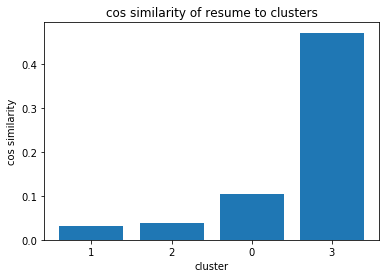

In [44]:
res_clust_sim = dict(sorted(res_clust_sim.items(), key=lambda item: item[1]))

pyplot.title('cos similarity of resume to clusters')
pyplot.xlabel('cluster')
pyplot.ylabel('cos similarity')
pyplot.bar(
    x = res_clust_sim.keys(),
    height = res_clust_sim.values());

In [ ]:
# It is apparent how skewed this user's resume document is to cluster 3. 
# How could one make improvements based off this? In general, are there 
# optimal outcomes with respect to peak vs uniformity of the cluster 
# similarities in this situation?
#
# Here are some suggestions from:
# - thinking of what it means quantitatively 
# - incorporating limited knowledge of NLP, modern hiring process's/technologies 
#   used by employers, the competencies expected of people who work with data,
#   and the data science profession
# 
# Quantitatively
#
# Since similarity (cosine) is parameterized on the angles between vectors
# and is negatively sloped; increasing the resume's similarity to a cluster(s)
# can have the effect of decreasing it to other clusters(s), that is, a tradeoff
# has to be made in that vector space. However in a different scenario 
# increasing the similarity to one cluster could increase the similarities to 
# most or all the clusters.
#
# This is easily understood with 3, 2D document vectors, with 2 equal angles 
# between them. Let the vector in the middle be the resume document, hence 
# decreasing the angle by rotating the middle vector closer to one of
# the other two necessarily increases the angle between the middle vector
# and the vector which it's now further away from (euclidean distance):
# the similarity to one cluster increases at the expense of the other.
#
# Likewise for the above example, if one of the outermost vectors is the 
# resume document, decreasing the angle to the middle vector would do 
# the same for the other and hence increase the similarity for both of them.
#
# This simple 2D example can be extended by adding vectors to select directions
# and checking the effects of trying to increase similarities under a different
# setup, not just to a local similarity (a cluster) but global similarities 
# (more than one cluster).
# 
# So depending on combinations of cardinalities and orientations of the 
# cluster vectors with respect to the resume vector, and the goals of 
# the job seeker: one can go about trying to maximize their similarity
# to one/group/all of the clusters, like a least squares algorithm would. 
#
# Qualitatively
#
# It's known that employers are using algorithms/models to assist filtering 
# the vast resumes they receive for a single position. So it's not a bad idea
# to craft resumes with this in mind. However I perceive there is a point of 
# diminishing return trying to minimize differences to a group of job descriptions. 
#
# This is attributed to several unknowns and their changing nature
# (regarding the filter(s) being used) in any one employer's hiring process,
# the limits of NLP, and the ability to properly sample this type of data. 
#
# The word clouds in the 3_cluster-requirement notebook showed things that
# I would expect to see from my time spent in the world of data science/analytics.
# My guess is that applicant tracking systems, HR people, and hiring managers 
# will be looking for things that were not explicitly written in the job description. 
#
# So at least having these words (or phrases if that's what was used in the 
# language model) on a resume, if only once, or having basic experience/knowledge 
# of them could very well help pass a boolean style check from a computer/human.
# 
# In Conclusion
# 
# Incorporating more of what's covered in the other clusters so that the 
# similarities are not as skewed, looks like a good course of action for 
# job seekers with a similar profile to the one is this project
# (very skewed to one cluster).
#
# This way, resumes and skill sets can be tailored more to a given cluster(s) 
# (representative of job categories) that are more desirable; helping to grab 
# the attention of the computers and humans involved in the hiring process. 
# While at the same time maintaining a baseline of similarity to other clusters
# so that a resume is not disqualified by those who consider it too narrow.


In [45]:
# examine top skills and sample job requirements from each cluster 

cw_file = open('data/clust_words.pkl', 'rb')
clust_words = pickle.load(cw_file)
cw_file.close()
random.seed(0)

for i in range(k):
    fetch_num = 7
    print('The top {} skills in cluster {} are: {}'.format(
        fetch_num, i, ', '.join(clust_words[i][:fetch_num])), end='\n\n')
    
    print('some sample job requirements or desired items:', end='\n\n')
    for j in range(5):
        print('- {} \n'.format(
            random.choice(tuple(clustered_bullets[i]))))
    print('\n')


The top 7 skills in cluster 0 are: experience, skills, python, ability, work, sql, communication

some sample job requirements or desired items:

- Develop impactful reports, presentations, and ongoing deliverables 

- Develops tools and libraries to create efficiencies for future work. 

- Strong passion for creative content curation and building brand awareness 

- Using one or more of the following software packages: scikit-learn, numpy, pandas, jupyter, matplotlib, scipy, nltk, spacy, keras, tensorflow 

- Communication skills including the ability to identify and communicate data driven insights 



The top 7 skills in cluster 1 are: data, experience, science, analysis, visualization, using, sources

some sample job requirements or desired items:

- Experience with common data science toolkits, such as R, Weka, NumPy, MatLab, etc. Excellence in at least one of these is highly desirable. 

- Build a high-throughput data pipeline for training in a distributed environment. 

- Experi